# Volume 4: Finite Element Method
    <Name> Dallin Stewart
    <Class> ACME 002
    <Date> Sometimes a hypocrite is nothing more than a man in the process of changing.

In [48]:
import scipy as sp
from scipy.sparse import spdiags, diags, csr_matrix
from scipy.sparse.linalg import spsolve
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

Use the finite element method to solve
 
εy" − y' = −1,

y(0) = α, y(1) = β,


where α = 2, β = 4, and ε = 0.02. Use N = 100 finite elements (101 grid points). Compare
your solution with the analytic solution

y(x) = α + x + (β − α − 1)* (e^(x/ε) − 1)/(e^(1/ε) − 1) by graphing.

Implement the function FEM(x, eps, alpha, beta) and use it to solve the differential equation.

In [49]:
def analytic_solution(x, alpha, beta, epsilon):
    """Calculates the analytic solution"""
    return alpha + x + (beta - alpha - 1)*(np.exp(x/epsilon)-1)/(np.exp(1/epsilon)-1)

In [50]:
def FEM(x, eps, alpha, beta):
    """ PARAMS:
    x (ndarray, (N+1)) - grid points to solve the ODE on (they might not be evenly-spaced)
    eps (float) - parameter in the ODE
    alpha (float) - left Dirichlet condition
    beta (float) - right Dirichlet condition
    """
    def a(i, j, h=[]):
        if j == i + 1:  return (eps/h[i+1]) + 0.5
        if j == i:      return -(eps/h[i]) - (eps/h[i+1])
        if j == i - 1:  return (eps/h[i]) - 0.5
        return 0

    def l(j,h=[]):
        return -0.5 * (h[j] + h[j+1])

    h = np.concatenate((np.array([0]), (np.roll(x,-1) - x)[:-1]))
    N = len(x)-1 # number of intervals

    # Construct the matrix A
    a1 = np.concatenate(([0], np.array([a(i, i-1, h) for i in range(2, N+1)])))
    a2 = np.concatenate(([1], np.array([a(i, i, h) for i in range(1, N)]), [1]))
    a3 = np.concatenate((np.array([a(i, i+1, h) for i in range(0, N-1)]), [0]))
    #creating A as sparse matrix
    A = csr_matrix(diags([a1, a2, a3],[1, 0, -1]))

    # Construct the vector phi
    phi = np.concatenate((np.array([alpha]), np.array([l(i,h) for i in range(1, N)]), np.array([beta])))

    # Solve the system
    k = spsolve(A, phi)
    return k

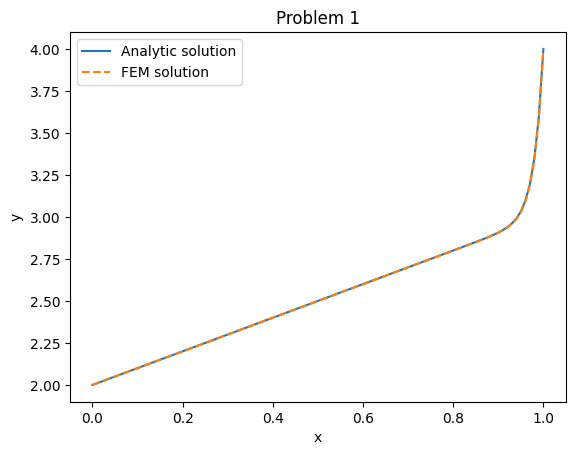

In [51]:
# initialize parameters
alpha = 2
beta = 4
epsilon = 0.02
N = 100
x = np.linspace(0, 1, N+1)

# calculate the analytic solution and the FEM solution
y = analytic_solution(x, alpha, beta, epsilon)
y_hat = FEM(x, epsilon, alpha, beta)

# plot the solutions
plt.plot(x, y, label='Analytic solution')
plt.plot(x, y_hat, linestyle="dashed", label='FEM solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Problem 1')
plt.legend()
plt.show()

# Problem 2

Compare the numerical solution when the grid points are unevenly spaced versus when the grid points
are clustered in the area of greatest change by plotting.

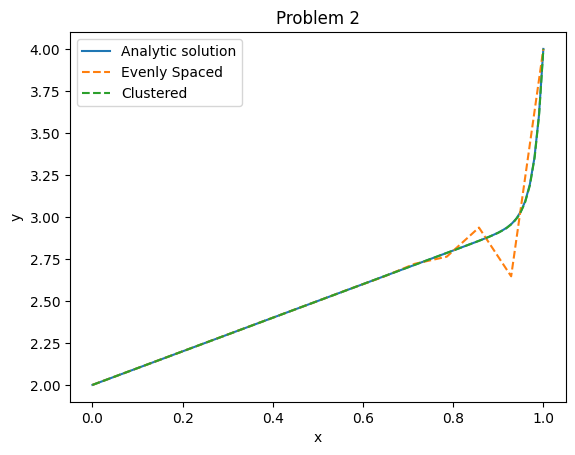

In [52]:
# initialize parameters
a = 0
b = 1
even_grid = np.linspace(a,b,15)
clustered_grid = np.linspace(a,b,15)**(1/8)
alpha = 2
beta = 4
epsilon = 0.02
N = 15

# calculate the analytic solution and the FEM solution
y = analytic_solution(x, alpha, beta, epsilon)
y_hat_even = FEM(even_grid, epsilon, alpha, beta)
y_hat_clust = FEM(clustered_grid, epsilon, alpha, beta)

# plot the solutions
plt.plot(x, y, label='Analytic solution')
plt.plot(even_grid, y_hat_even, linestyle="dashed", label='Evenly Spaced')
plt.plot(clustered_grid, y_hat_clust, linestyle="dashed", label='Clustered')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Problem 2')
plt.legend()
plt.show()

# Problem 3

Solve 

$\epsilon y'' - y' = -1$

$y(0)=\alpha, y(1)=\beta$

with the finite element method using N = 2i finite elements, i = 4, 5, . . . , 21.
Use a log-log plot to graph the error.

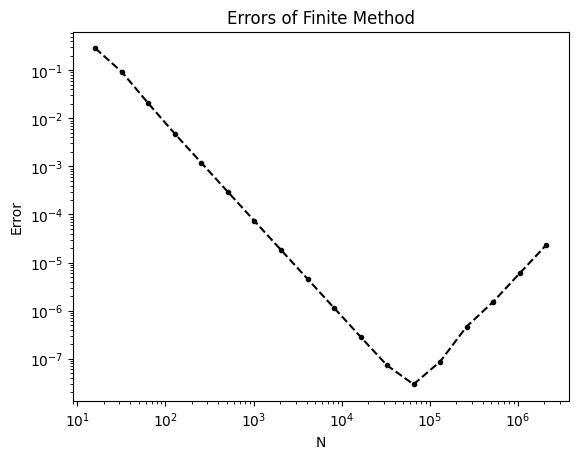

In [54]:
errors = []
for i in range(4, 22):
    n = 2**i
    x = np.linspace(0, 1, n)
    y_true = analytic_solution(x, alpha, beta, epsilon)
    y_hat = FEM(x, epsilon, alpha, beta)
    errors.append(np.linalg.norm(y_true - y_hat, ord=np.inf))

#plotting log errors
plt.loglog(2**np.arange(4, 22), errors,'--.', color='k')
plt.title("Errors of Finite Method")
plt.xlabel('N')
plt.ylabel('Error')
plt.show()